# Mapeando el Universo



## Análisis y Curación

### Lectura de datos

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn

In [4]:
filename = "dataset/DiploDatos.csv"

In [5]:
df = pd.read_csv(filename,index_col=0)

### Uniendo dataframes

* Vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [6]:
filename = 'dataset/DiploDatos_Zoo.csv'

In [7]:
zoo = pd.read_csv(filename,index_col=0)

In [8]:
dd = df.join(zoo)

In [9]:
dd[:5]

,z,zErr,zWarning,subClass,velDisp,velDispErr,ra,dec,raErr,decErr,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,0.000006,0,STARBURST,60.39996,30.544140,197.448850,4.249896,0.011085,0.011415,...,139.46250,137.47360,0.127639,0.099456,0.068803,0.051128,0.038030,0.0,0.0,1.0
957066087332079616,0.141718,0.000031,0,null,217.80020,12.076850,197.458925,4.451149,0.009319,0.007280,...,71.49205,72.21062,0.127611,0.099434,0.068788,0.051117,0.038022,0.0,0.0,1.0
957065537576265728,0.140137,0.000023,0,null,138.90830,13.126220,197.473340,4.417710,0.007592,0.008524,...,24.82063,24.60648,0.128181,0.099878,0.069095,0.051345,0.038191,1.0,0.0,0.0
957066911965800448,0.066672,0.000016,0,null,241.28300,7.109093,197.583262,4.300230,0.003696,0.003337,...,76.89522,78.38448,0.133984,0.104400,0.072223,0.053670,0.039920,0.0,1.0,0.0
957067186843707392,0.183667,0.000007,0,STARFORMING,118.87630,22.979400,197.601252,4.397977,0.023678,0.015545,...,96.26978,95.24163,0.129051,0.100555,0.069564,0.051693,0.038450,NaN,NaN,NaN


-----------------------------------------------------

# **Resolución Punto 1 - Análisis general**
 
### **1.1)** Describir el conjunto de datos.

In [10]:
# Seleccionamos 33 variables con las que vamos a trabajar

important_cols = ['z', 'velDisp', 'ra', 'dec', 'subClass',
                  'modelMag_u', 'modelMag_g','modelMag_r','modelMag_i', 'modelMag_z', 
                  'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
                  'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z',
                  'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z',
                  'petroRad_u','petroRad_g','petroRad_r','petroRad_i','petroRad_z',
                  'spiral', 'elliptical', 'uncertain',]

In [11]:
data= dd[important_cols]

In [12]:
data.dtypes

z             float64
velDisp       float64
ra            float64
dec           float64
subClass       object
modelMag_u    float64
modelMag_g    float64
modelMag_r    float64
modelMag_i    float64
modelMag_z    float64
petroMag_u    float64
petroMag_g    float64
petroMag_r    float64
petroMag_i    float64
petroMag_z    float64
deVRad_u      float64
deVRad_g      float64
deVRad_r      float64
deVRad_i      float64
deVRad_z      float64
expRad_u      float64
expRad_g      float64
expRad_r      float64
expRad_i      float64
expRad_z      float64
petroRad_u    float64
petroRad_g    float64
petroRad_r    float64
petroRad_i    float64
petroRad_z    float64
spiral        float64
elliptical    float64
uncertain     float64
dtype: object

In [13]:
# Descripción del conjunto de datos numéricos

data.describe().round(3)

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
count,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,...,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,864064.000,621957.000,621957.000,621957.000
mean,0.147,152.105,180.985,23.170,19.357,17.631,16.840,16.340,15.969,19.320,...,1.578,1.309,10.571,5.773,5.586,5.507,5.777,0.286,0.094,0.620
std,0.113,99.785,68.994,19.353,87.577,86.220,75.435,79.185,83.465,87.580,...,79.088,83.358,18.943,5.313,4.180,4.708,5.663,0.452,0.291,0.485
min,-0.011,0.000,0.001,-11.253,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,-9999.000,...,-9999.000,-9999.000,0.000,0.000,0.036,0.000,0.002,0.000,0.000,0.000
25%,0.074,87.723,145.631,6.391,19.137,17.663,16.867,16.455,16.146,19.083,...,1.156,1.008,3.096,3.572,3.676,3.588,3.540,0.000,0.000,0.000
50%,0.115,142.108,183.556,21.064,19.879,18.257,17.414,16.989,16.684,19.797,...,1.611,1.496,5.494,4.864,4.811,4.657,4.626,0.000,0.000,1.000
75%,0.175,202.606,221.971,37.826,20.718,18.820,17.780,17.367,17.111,20.608,...,2.724,2.426,9.854,6.585,6.388,6.183,6.212,1.000,0.000,1.000
max,1.002,850.000,359.998,71.767,31.771,32.297,33.846,32.102,29.184,41.271,...,59.372,63.406,258.573,258.476,258.465,258.462,258.535,1.000,1.000,1.000


In [14]:
# Descripción del conjunto de datos no numéricos

data.describe(include=['object'])

,subClass
count,864064
unique,8
top,null
freq,543479


In [15]:
# Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ 
# en los nombres de las variables/columnas

data.columns[~data.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

**NOTA:**    
* Tenemos una base de datos con 864.064 registros
* No tenemos valores raros en los nombres de las variables.

### **1.2)** Tratamiento de datos duplicados

In [16]:
# Buscamos datos duplicados

data[data.duplicated(keep=False)]

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,expRad_i,expRad_z,petroRad_u,petroRad_g,petroRad_r,petroRad_i,petroRad_z,spiral,elliptical,uncertain
specObjID,,,,,,,,,,,,,,,,,,,,,


In [17]:
# Estadísticos descriptivos del índice= specObjID

pd.Series(data.index,dtype=str).describe()

count    8.640640e+05
mean     1.631710e+18
std      8.177153e+17
min      2.994897e+17
25%      9.143824e+17
50%      1.597679e+18
75%      2.275515e+18
max      3.383417e+18
Name: specObjID, dtype: float64

**NOTA:**    
* No se detectaron registros duplicados buscando por el índice.

### **1.3)** Tratamiento de datos faltantes.

In [18]:
# Obtenemos el número de valores faltantes por columna 

missing_values_count = data.isnull().sum()
missing_values_count[missing_values_count > 0]

spiral        242107
elliptical    242107
uncertain     242107
dtype: int64

In [19]:
# Calculamos el impacto en términos relativos que tienen los valores nulos

len(data.dropna())/len(data)

0.7198043200503667

In [20]:
# Completamos con 0 los valores faltantes

data_full = data.fillna('0')

In [21]:
missing_values_count = data_full.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

**NOTA:**   
* Tenemos 242.107 filas sin valor en las columnas: **spiral**, **elliptical** y **uncertain**.
* Eliminar valores nulos siempre es la ultima opción.
* Elegimos la opción de rellenar los valores faltantes con 0.

### **1.4)** Tratamiento de outliers.

In [22]:
# PRIMER PASO: Codificamos las variables categóricas como variables numéricas

from sklearn.preprocessing import LabelBinarizer

other_column = 'subClass'
lb = LabelBinarizer()

data_cod=pd.DataFrame(lb.fit_transform(data_full[other_column]),
                      columns=((other_column + '_') + pd.Series(lb.classes_)),
                      index=data_full.index)

In [23]:
data_cod.shape

(864064, 8)

In [24]:
# Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ 
# en los nombres de las variables/columnas

data_cod.columns[~data_cod.columns.str.match(r'^(\w+)$')]

Index(['subClass_AGN BROADLINE', 'subClass_STARBURST BROADLINE',
       'subClass_STARFORMING BROADLINE'],
      dtype='object')

In [25]:
# Reemplazamos el espacio vacío detectado en el nombre de las variables por un guión bajo

data_cod.columns = data_cod.columns.str.replace(' ', '_')
data_cod.head()

,subClass_AGN,subClass_AGN_BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST_BROADLINE,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,subClass_null
specObjID,,,,,,,,
957075158303008768,0,0,0,1,0,0,0,0
957066087332079616,0,0,0,0,0,0,0,1
957065537576265728,0,0,0,0,0,0,0,1
957066911965800448,0,0,0,0,0,0,0,1
957067186843707392,0,0,0,0,0,1,0,0


In [26]:
data_cod.dtypes

subClass_AGN                      int32
subClass_AGN_BROADLINE            int32
subClass_BROADLINE                int32
subClass_STARBURST                int32
subClass_STARBURST_BROADLINE      int32
subClass_STARFORMING              int32
subClass_STARFORMING_BROADLINE    int32
subClass_null                     int32
dtype: object

In [27]:
# SEGUNDO PASO: Unimos los dataframes 

data_join = data_full.join(data_cod)
data_join[:5]

,z,velDisp,ra,dec,subClass,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,...,elliptical,uncertain,subClass_AGN,subClass_AGN_BROADLINE,subClass_BROADLINE,subClass_STARBURST,subClass_STARBURST_BROADLINE,subClass_STARFORMING,subClass_STARFORMING_BROADLINE,subClass_null
specObjID,,,,,,,,,,,,,,,,,,,,,
957075158303008768,0.012095,60.39996,197.448850,4.249896,STARBURST,18.10708,17.34184,17.08753,16.99253,16.87547,...,0,1,0,0,0,1,0,0,0,0
957066087332079616,0.141718,217.80020,197.458925,4.451149,null,19.56142,17.60611,16.52897,16.07807,15.72277,...,0,1,0,0,0,0,0,0,0,1
957065537576265728,0.140137,138.90830,197.473340,4.417710,null,19.56201,18.19559,17.34286,16.92395,16.61079,...,0,0,0,0,0,0,0,0,0,1
957066911965800448,0.066672,241.28300,197.583262,4.300230,null,18.38973,16.40218,15.47812,15.05008,14.72299,...,1,0,0,0,0,0,0,0,0,1
957067186843707392,0.183667,118.87630,197.601252,4.397977,STARFORMING,19.44434,18.39804,17.81157,17.45442,17.30775,...,0,0,0,0,0,0,0,1,0,0


In [28]:
data_join.shape

(864064, 41)

In [29]:
data_join.dtypes

z                                 float64
velDisp                           float64
ra                                float64
dec                               float64
subClass                           object
modelMag_u                        float64
modelMag_g                        float64
modelMag_r                        float64
modelMag_i                        float64
modelMag_z                        float64
petroMag_u                        float64
petroMag_g                        float64
petroMag_r                        float64
petroMag_i                        float64
petroMag_z                        float64
deVRad_u                          float64
deVRad_g                          float64
deVRad_r                          float64
deVRad_i                          float64
deVRad_z                          float64
expRad_u                          float64
expRad_g                          float64
expRad_r                          float64
expRad_i                          

In [30]:
# pasamos a int las variables `spiral`, `elliptical`y `uncertain`
data_join['spiral'] = data_join['spiral'].astype(str).astype(float).astype(int)
data_join['elliptical'] = data_join['elliptical'].astype(str).astype(float).astype(int)
data_join['uncertain'] = data_join['uncertain'].astype(str).astype(float).astype(int)

In [31]:
# TERCER PASO: 
# A) Buscamos los outliers de la variable redshift "z"
# Consideramos los valores que se encuentren a más-menos 3 desviaciones estándares de la media

# Filtrado de outliers 

def clean_outliers(dataset, column_name):
    interesting_col = dataset[column_name]
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (3 * interesting_col.std()))
    return dataset[mask_outlier]

In [32]:
data_clean_z = clean_outliers(data_join, "z")
print("Filas removidas", len(data_join) - len(data_clean_z))

Filas removidas 11164


In [33]:
# Calculamos el impacto en términos relativos que tiene remover los outliers de "z"

len(data_clean_z)/len(data_join)

0.9870796607658692

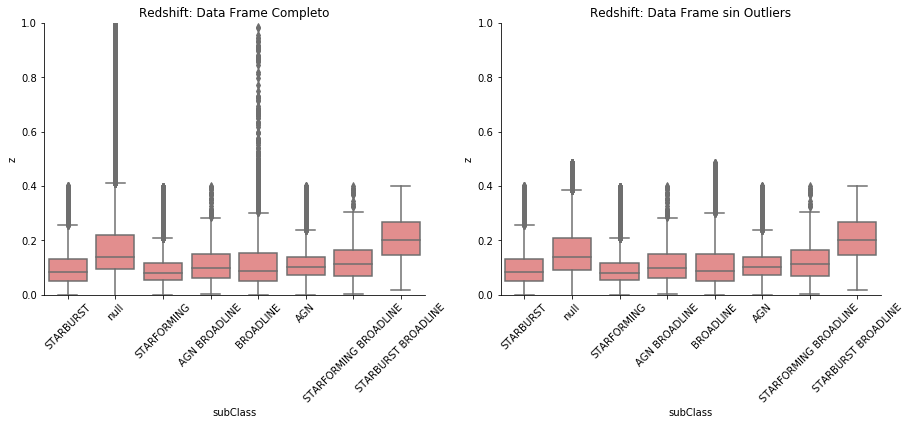

In [34]:
# Gráfico boxplot para identificar outlaiers en la variable "redshift"

plt.figure (figsize=(15,5))

plt.subplot(121)
plt1=seaborn.boxplot(data=data_join, color='lightcoral', y='z', x='subClass')
plt.ylim(0,1)
plt.title('Redshift: Data Frame Completo')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

plt.subplot(122)
plt2=seaborn.boxplot(data=data_clean_z, color='lightcoral', y='z', x='subClass')
plt.ylim(0,1)
plt.title('Redshift: Data Frame sin Outliers')
plt.ylabel('z')
plt.xlabel('subClass')
plt.xticks(rotation=45)
seaborn.despine()

**NOTA:**      
* Decidimos no descartar los outliers detectados en la variable **z**(redshift).
* Buscaremos outliers en las variables referentes a las distintas bandas de las dos magnitudes **modelMag** y **petroMag**

In [35]:
# TERCER PASO: 
# B) Buscamos los outliers de las variables de las magnitudes

# B1) Filtramos el valor atípico -9999 de las variables correspondientes a las bandas r,u,g,z,i calculadas con petroMag
filter_petro=(data_join.petroMag_r!=-9999) & (data_join.petroMag_u!=-9999) & (data_join.petroMag_g!=-9999)  & (data_join.petroMag_z!=-9999) & (data_join.petroMag_i!=-9999)
data_clean_9999=data_join[(filter_petro)]

print("Filas removidas", len(data_join) - len(data_clean_9999))

Filas removidas 69


In [36]:
# B2) Filtramos el valor atípico -9999 de las variables correspondientes a las bandas r,u,g,z,i calculadas con modelMag
filter_model=(data_join.modelMag_r!=-9999) & (data_join.modelMag_u!=-9999) & (data_join.modelMag_g!=-9999)  & (data_join.modelMag_z!=-9999) & (data_join.modelMag_i!=-9999)
data_clean_9999_2=data_join[(filter_model)]

print("Filas removidas", len(data_clean_9999) - len(data_clean_9999_2))

data_clean=data_clean_9999_2

Filas removidas 2


In [41]:
# B3) Filtramos los valores que se encuentren a más-menos 3 desviaciones estándares de la media

data_clean_mag = clean_outliers(data_clean, "petroMag_r")
data_clean_mag = clean_outliers(data_clean, "petroMag_g")
data_clean_mag = clean_outliers(data_clean, "petroMag_u")
data_clean_mag = clean_outliers(data_clean, "petroMag_z")
data_clean_mag = clean_outliers(data_clean, "petroMag_i")
data_clean_mag = clean_outliers(data_clean, "modelMag_r")
data_clean_mag = clean_outliers(data_clean, "modelMag_g")
data_clean_mag = clean_outliers(data_clean, "modelMag_u")
data_clean_mag = clean_outliers(data_clean, "modelMag_z")
data_clean_mag = clean_outliers(data_clean, "modelMag_i")

print("Filas removidas", len(data_clean) - len(data_clean_mag))

Filas removidas 11115


(8, 40)

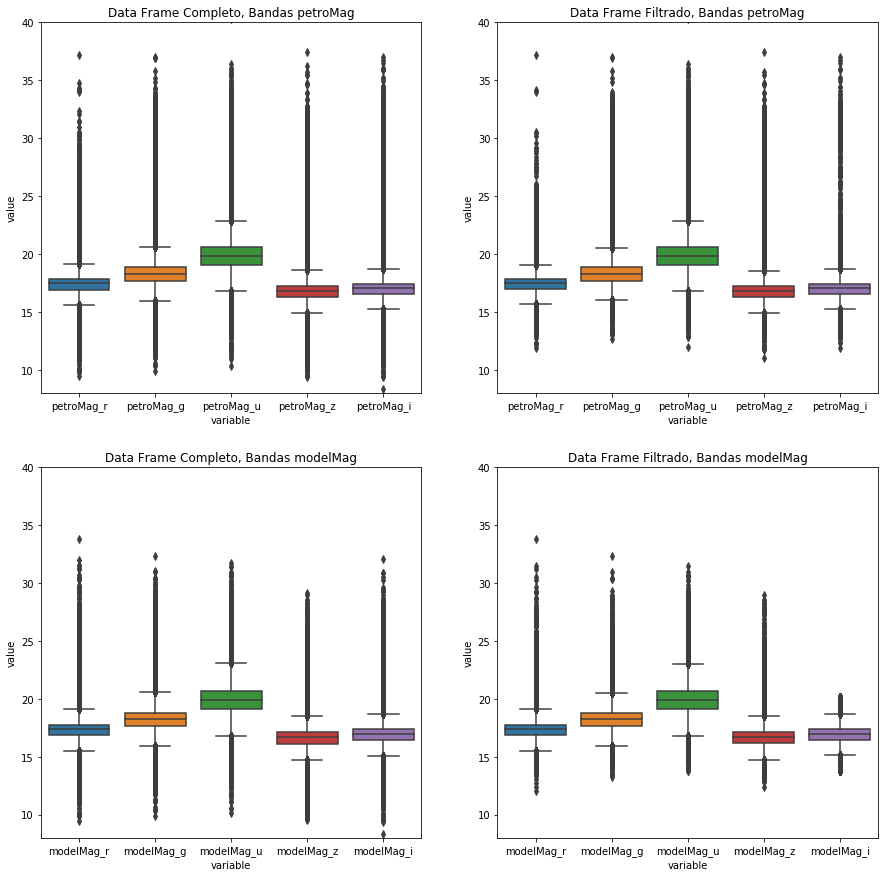

In [64]:
# Gráfico boxplot para identificar outlaiers en las variables correspondientes a las bandas r,u,g,z,i calculadas con petroMag

plt.figure (figsize=(15,15))

plt.subplot(221)
plt1=pd.DataFrame(data=data_join, columns=['petroMag_r','petroMag_g','petroMag_u','petroMag_z','petroMag_i'])
seaborn.boxplot(x="variable", y="value", data=pd.melt(plt1))
plt.title('Data Frame Completo, Bandas petroMag')
plt.ylim(8,40)

plt.subplot(222)
plt2=pd.DataFrame(data=data_clean_mag, columns=['petroMag_r','petroMag_g','petroMag_u','petroMag_z','petroMag_i'])
seaborn.boxplot(x="variable", y="value", data=pd.melt(plt2))
plt.title('Data Frame Filtrado, Bandas petroMag')
plt.ylim(8,40)

plt.subplot(223)
plt3=pd.DataFrame(data=data_join, columns=['modelMag_r','modelMag_g','modelMag_u','modelMag_z','modelMag_i'])
seaborn.boxplot(x="variable", y="value", data=pd.melt(plt3))
plt.title('Data Frame Completo, Bandas modelMag')
plt.ylim(8,40)

plt.subplot(224)
plt4=pd.DataFrame(data=data_clean_mag, columns=['modelMag_r','modelMag_g','modelMag_u','modelMag_z','modelMag_i'])
seaborn.boxplot(x="variable", y="value", data=pd.melt(plt4))
plt.title('Data Frame Filtrado, Bandas modelMag')
plt.ylim(8,40)


In [65]:
data_clean_mag.shape

(852878, 41)

In [67]:
print("Filas removidas", len(data_join) - len(data_clean_mag))

Filas removidas 11186


**NOTA:**      
* Decidimos filtrar los outliers detectados en las variables correspondientes a las distintas bandas de las dos magnitudes **modelMag** y **petroMag**
* Se removieron 71 registros con el valor atípico -9999
* Se removieron 11.115 registros con el criterio de distancia de más-menos 3 desviaciones estándares de la media
* En total se removieron 11.186 registros
* El dataset a utilizar será: **data_clean_mag** con 852.878 registros

### **1.5)** Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?

**NOTA:** Las variables más importantes a considerar en este estudio serían las magnitudes de las galaxias, en las distintas bandas fotométricas, así como la posicion angular en el cielo de las mismas y el redshift obtenido a partir de la espectroscopia.

### **1.6)** Implementar herramientas en pos de la reproducibilidad de resultados.
**NOTA:** Para asegurar la reproducibilidad de los resultados, optamos por crear un contenedor en **DOCKER**. Detallaremos todos los requisitos en el **Dockerfile**.

---------------------------------------------------

# **Resolución Punto 2 - Análisis estadístico**

### **2.1)** Nos ha contado el especialista que del proceso de adquisición de los mismos se asegura que los datos son correctos y/o completos para aquellos objetos que tienen Magnitudes Pretosian en la banda r entre 14.5 y 17.77. Incluyan esta selección en su análisis.

In [68]:
# VERO: Yo no eliminaria esos registros porque nuestro objetivo no es clasificar la forma de la galaxia sino el redshift

# hay que modificar estas funciones con la nueva nomenclatura

filter_zoo=(data_join.spiral==0) & (data_join.elliptical==0) & (data_join.uncertain==0) 
data_2=data_join[(filter_mag)&(filter_zoo)]
data_2.shape

In [71]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot(111)
seaborn.scatterplot(data_join.z[(filter_mag)&(filter_zoo)],data_join.petroMag_r[(filter_mag) & (filter_zoo)] )

A partir del grafico anterior podemos observar que la distribucion de las magnitudes a medida 
que el redshift aumenta el rango de valores disminuye. Esto es porque a medida que el redshift aumenta 
las galaxias más débiles no se observan. 

In [ ]:
df_filter = data_2[ (df['petroMag_r'] >= 14.5) & (df['petroMag_r'] <= 17.77) ]
print(data_2.shape)
print(df_filter.shape)

print("Filas removidas con este constraint: %d"%(data_2.shape[0]-df_filter.shape[0]))

In [ ]:
df_filter

In [ ]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot(111)
seaborn.scatterplot(df_filter.z,df_filter.petroMag_r)

A partir del grafico anterior podemos observar que para z<0.1 una galaxia de magnitud 15.5, 
puede observarse. Sin embargo a medida que aumenta el redshift una galaxia de dicha magnitud 
es mas dificil de observar. 

### **2.2)** Explorar la base de datos en búsqueda de datos repetidos, en caso de hallarlos elegir la estrategia para su limpieza.

In [ ]:
duplicated_df = df_filter[df_filter.duplicated()]
duplicated_df

### **2.3)** Dado que los datos son recolectados a través de mapeos sucesivos del cielo es posible que una galaxia sea observada más de una vez, y en cada observación se le asigne un ID diferente. Propongan una idea para defectar la base de datos de este problema.
* **Extra**: el especialista en datos no confía en objetos que tengan una separación angular con otro objeto menor a 1" de arco. Intenten limpiar los datos empleando este criterio.

In [ ]:
#----Determinacion de distancia angular-----------------------------------------
def ang_sep(lon1, lat1, lon2, lat2):
    """
    Angular separation between two points on a sphere

    Parameters
    ----------
    lon1, lat1, lon2, lat2 : Angle, Quantity or float
        Longitude and latitude of the two points.  Quantities should be in
        angular units; floats in deg

    Returns
    -------
    angular separation : Quantity or float
        Type depends on input; Quantity in angular units, or float in deg

    Notes
    -----
    The angular separation is calculated using the Vincenty formula [1]_,
    which is slightly more complex and computationally expensive than
    some alternatives, but is stable at at all distances, including the
    poles and antipodes.

    .. [1] http://en.wikipedia.org/wiki/Great-circle_distance
    """
    
    sdlon = np.sin(np.deg2rad(lon2) - np.deg2rad(lon1))
    cdlon = np.cos(np.deg2rad(lon2) - np.deg2rad(lon1))
    slat1 = np.sin(np.deg2rad(lat1))
    slat2 = np.sin(np.deg2rad(lat2))
    clat1 = np.cos(np.deg2rad(lat1))
    clat2 = np.cos(np.deg2rad(lat2))
    num1 = clat2 * sdlon
    num2 = clat1 * slat2 - slat1 * clat2 * cdlon
    denominator = slat1 * slat2 + clat1 * clat2 * cdlon
    sep = np.arctan2(np.sqrt(num1 ** 2 + num2 ** 2), denominator)
#    return np.rad2deg(sep)
    return sep

In [ ]:
## Este codigo tarda mucho tiempo ,no correr con todos los datos.
ind_l=[]
for i in range(len(df_filter)):
    sep=ang_sep(df_filter.ra[df_filter.index[i]], df_filter.dec[df_filter.index[i]],df_filter.ra, df_filter.dec )
    ind=df_filter.index[np.where(sep<1./3600.)]
    for j in range(len(ind)): 
        if df_filter.index[i]!=ind[j]: # aca podemos agregar que ademas ese indice no este ya en la lista
            ind_l.append(ind[j])

In [ ]:
num=np.asarray(ind_l)
num=np.unique(num)
len(num)

In [ ]:
print("Numero de galaxias que estan a menos de 1'' con respecto a otra: %d"%(num.shape))

Saco las galaxias duplicadas del catálogo

In [ ]:
for i in range(len(ind)):
    b=ind[i]==df_filter.index
    b=np.logical_not(b)
    df_filter=df_filter[b]

### **2.4)** Propongan una estrategia para tratar los datos faltantes (en algunas columnas los datos faltantes fueron sustituidos por valores extremos). Quitar o imputar?. Calcular los estadísticos de las distribuciones resultantes.


### **2.5)** Añadir los campos con los colores calculados tanto para magnitudes petrosian como magnitudes model.


In [ ]:
df['modelColor_ug'] = df['modelMag_u'] - df['modelMag_g']
df['modelColor_gr'] = df['modelMag_g'] - df['modelMag_r']
df['modelColor_ri'] = df['modelMag_r'] - df['modelMag_i']
df['modelColor_iz'] = df['modelMag_i'] - df['modelMag_z']
df['petroColor_ug'] = df['petroMag_u'] - df['petroMag_g']
df['petroColor_gr'] = df['petroMag_g'] - df['petroMag_r']
df['petroColor_ri'] = df['petroMag_r'] - df['petroMag_i']
df['petroColor_iz'] = df['petroMag_i'] - df['petroMag_z']

### **2.6)** En función de las correlaciones observadas en el práctico anterior, y con respecto a nuestra variable objetivo, propongan qué variables se podría excluir del dataset. 


### **2.7)** Guardar el dataset "limpio" y generar un archivo README que contenga todos los pasos implementados en la curación de los datos.


### **2.8)** Armen un contenedor de docker con las versiones exactas de todas las bibliotecas utilizadas.